# Exploratory Data Analysis (EDA) for Telecom Churn Dataset

This notebook explores and analyzes the telecom churn dataset. The goal is to clean the data, visualize important patterns, and understand potential predictors of customer churn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Data
Upload telecom_churn.csv from user's machine

In [3]:
from google.colab import files
uploaded = files.upload()

Saving telecom_churn.csv to telecom_churn.csv


## Data Overview

We examine the first few rows and general information to understand the structure and types of features.

In [4]:
df = pd.read_csv('telecom_churn.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Cleaning

We replace blanks with NaN, remove missing values, and encode categorical variables.

In [13]:
df_original = df.copy()
# Replace empty strings with NaN and drop missing
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)

# Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    if col != 'Churn':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Encode target
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

## Feature Scaling

We normalize numerical features using StandardScaler.

In [6]:
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')
df[num_cols] = scaler.fit_transform(df[num_cols])

## Churn Distribution

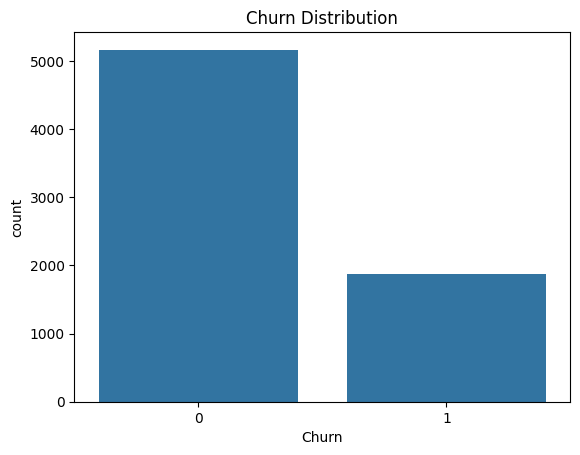

In [7]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

## Feature Correlation

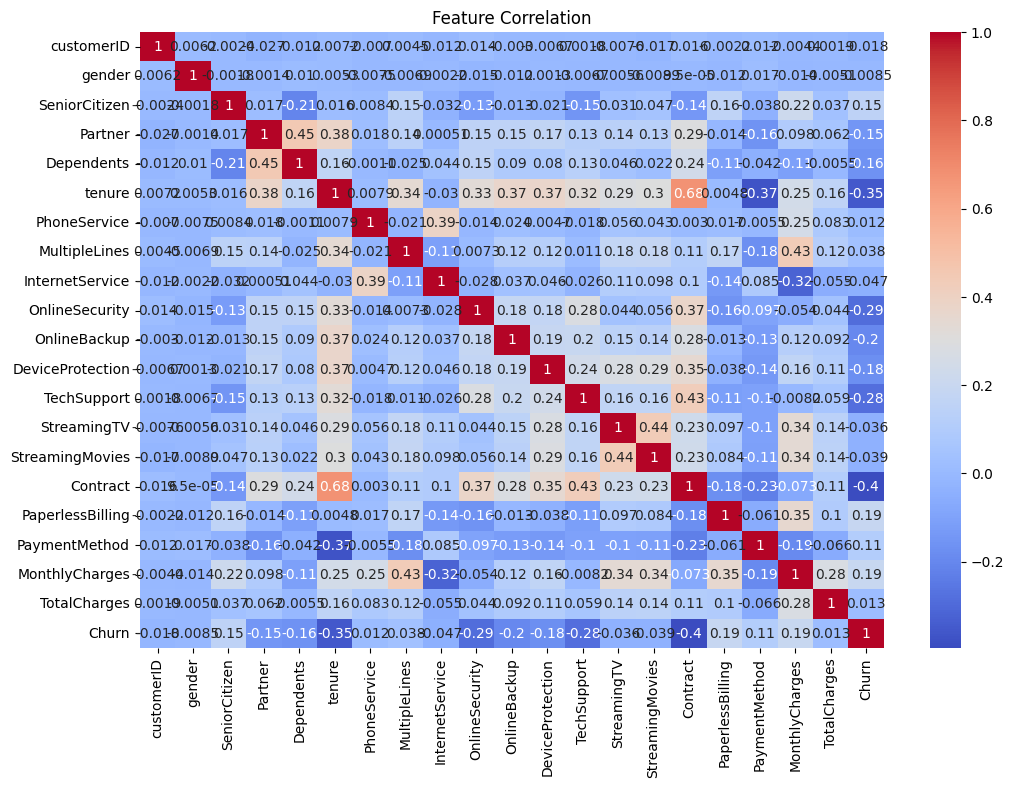

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

## Distribution of Numerical Features

The following plots show the distribution of each numerical feature.

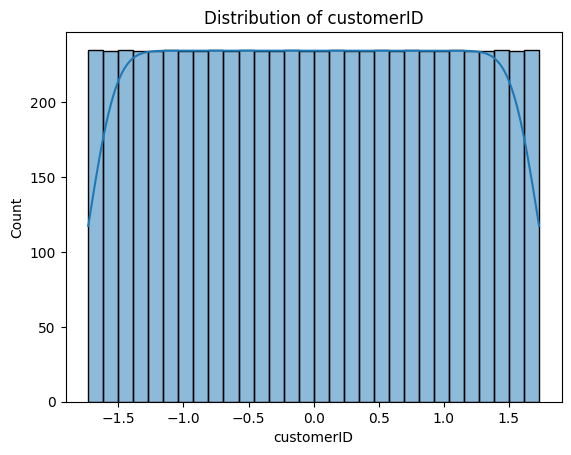

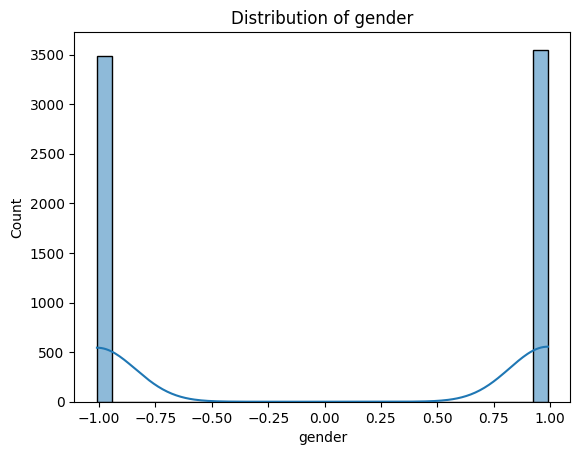

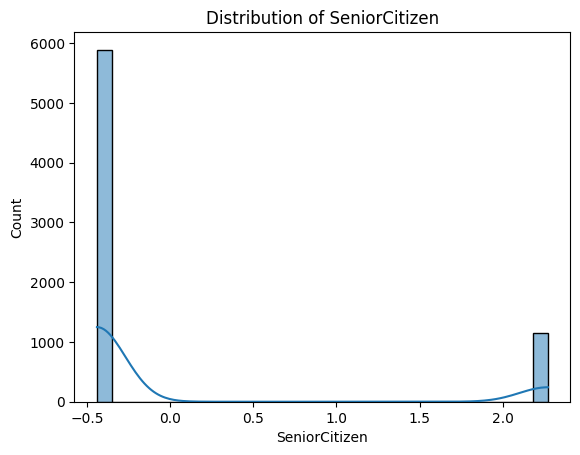

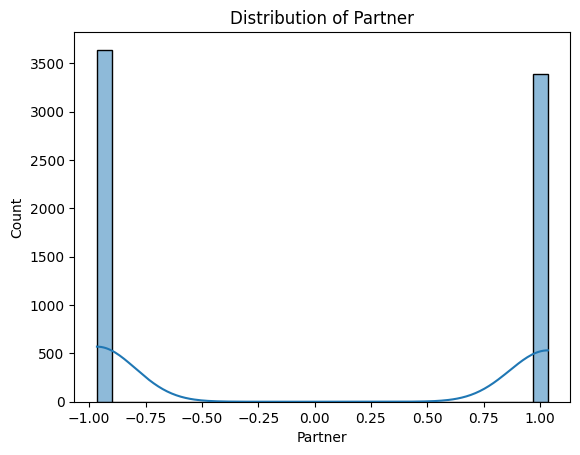

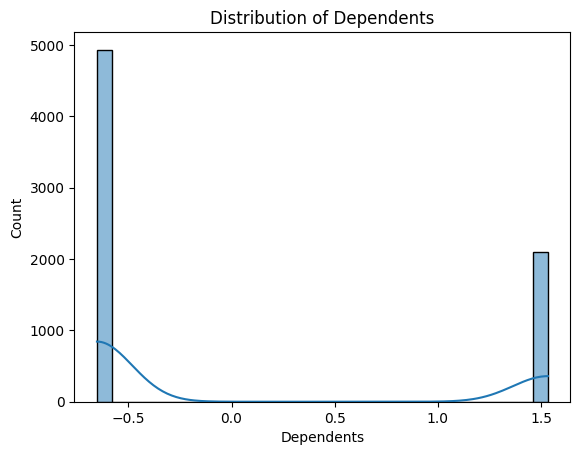

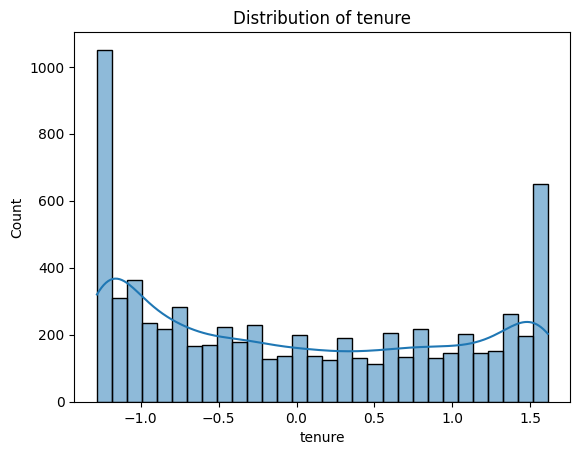

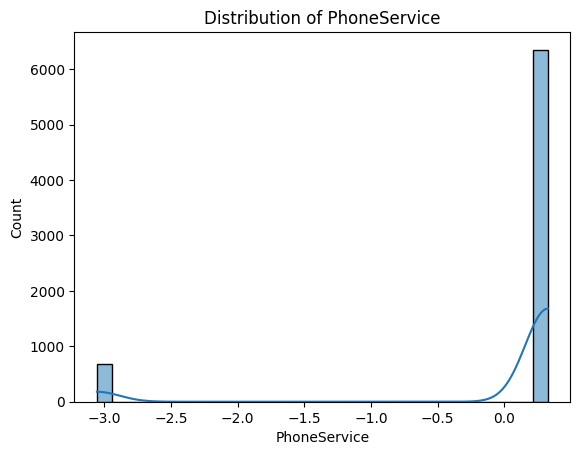

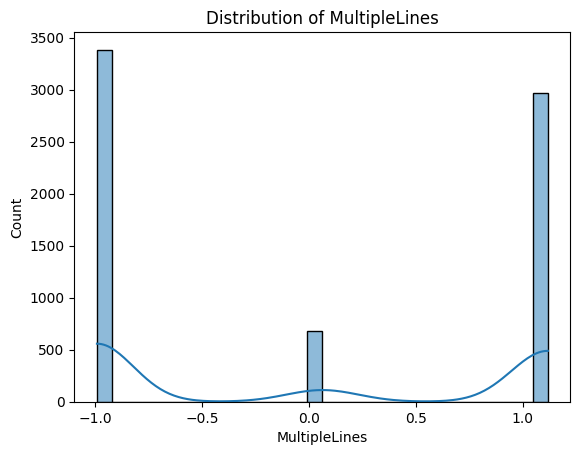

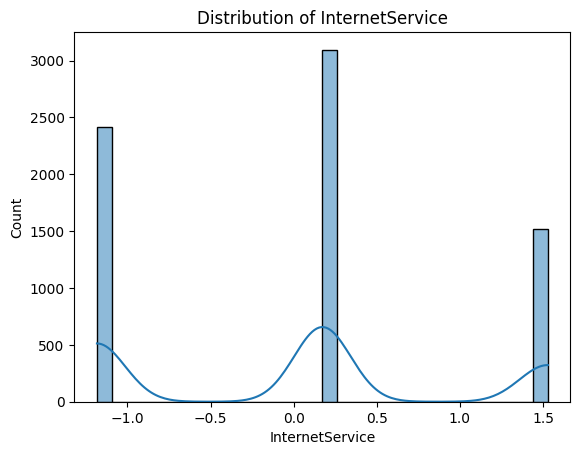

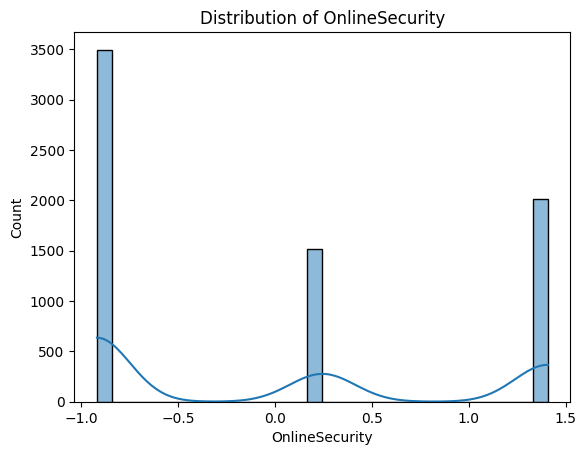

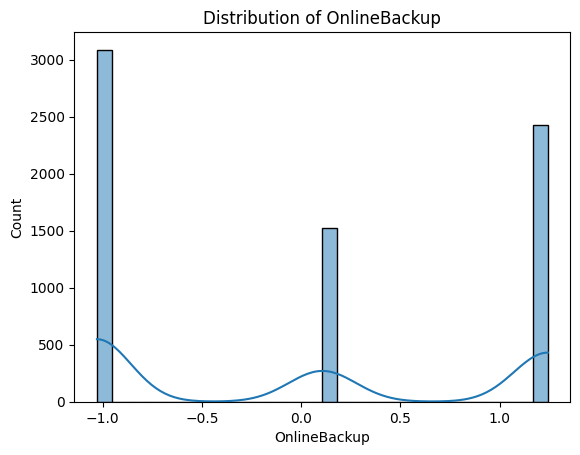

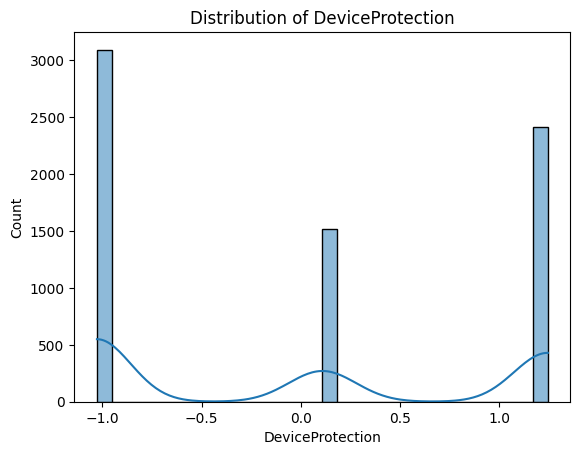

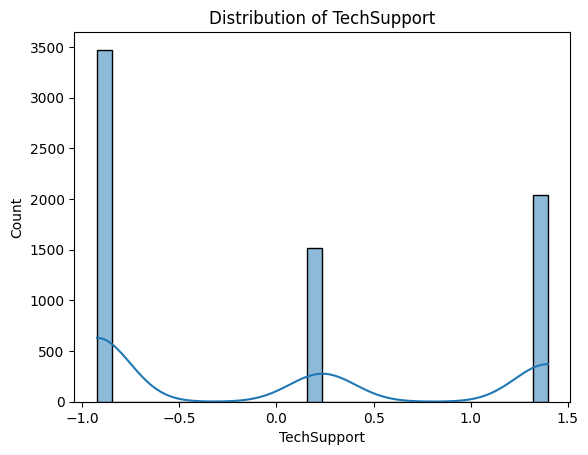

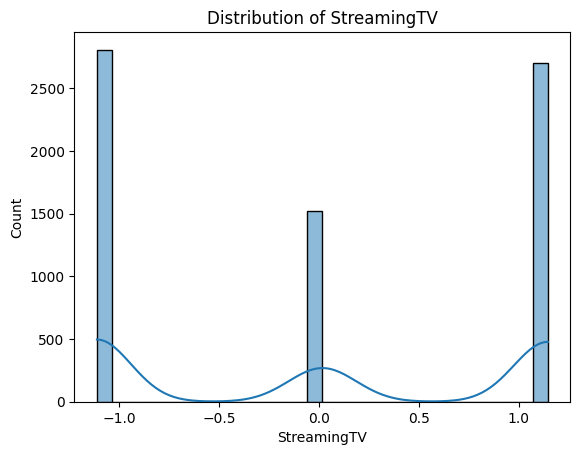

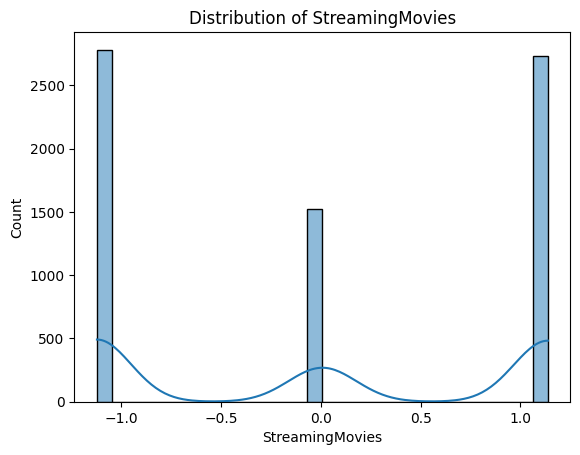

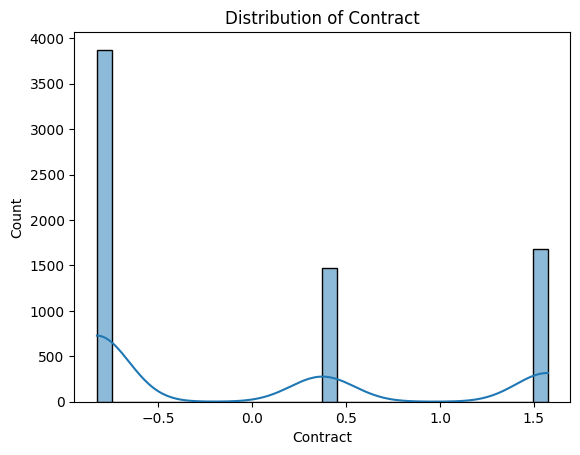

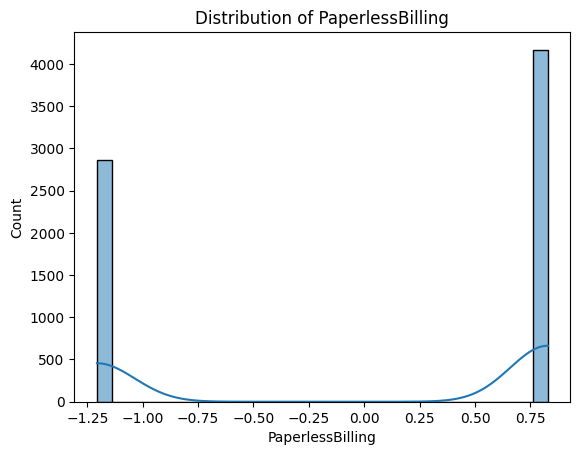

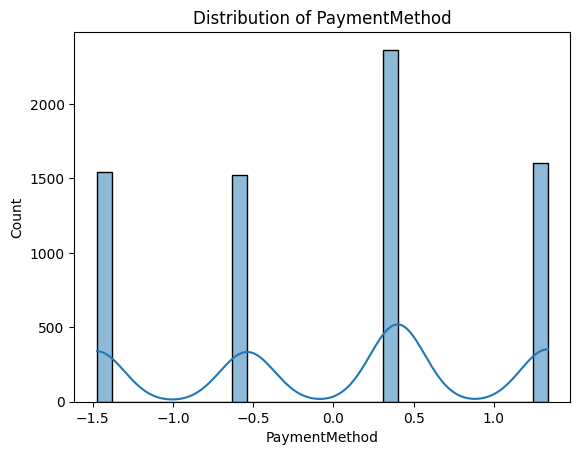

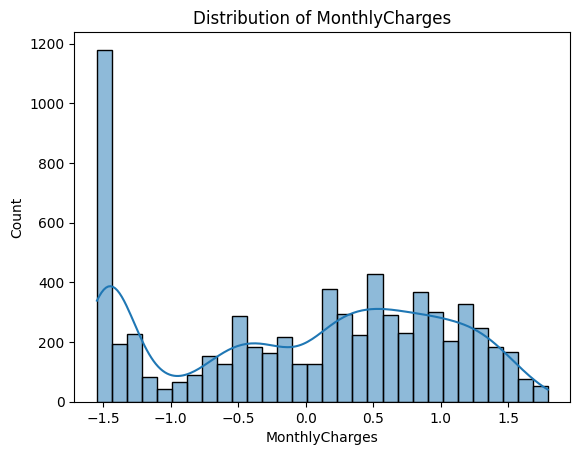

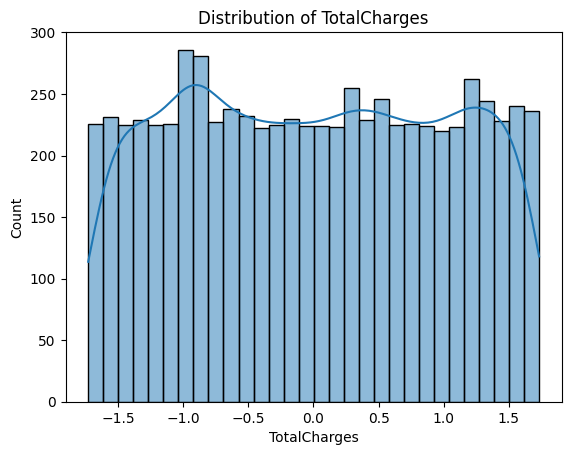

In [9]:
for col in num_cols:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

## Outliers and Target Relation

We use boxplots to observe how each feature differs across churn classes.

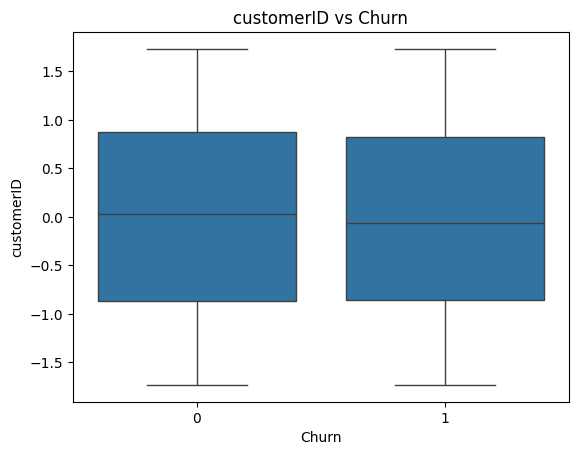

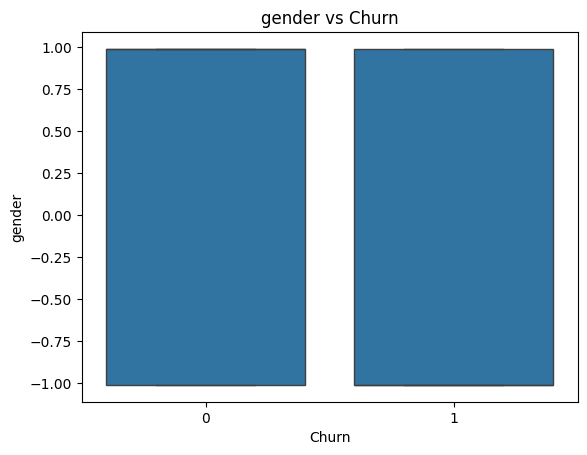

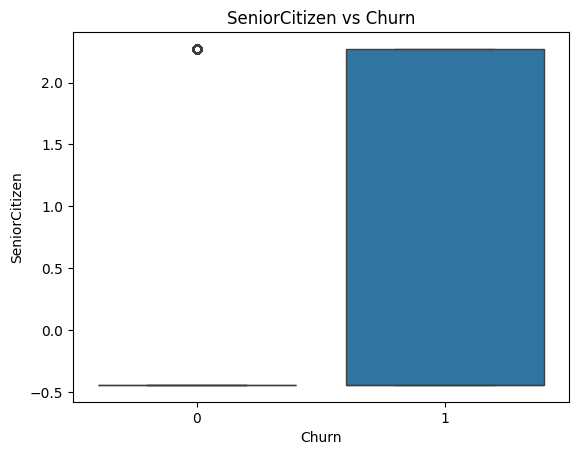

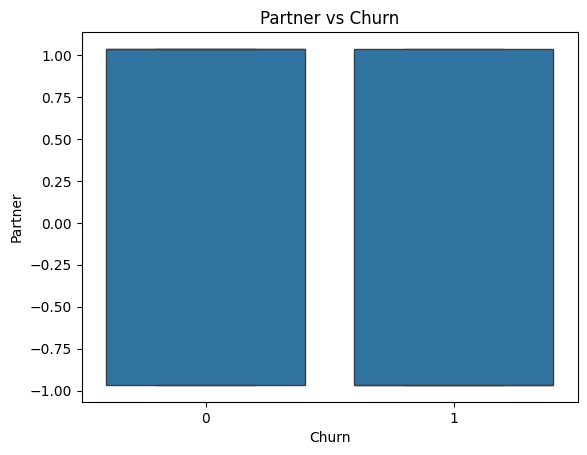

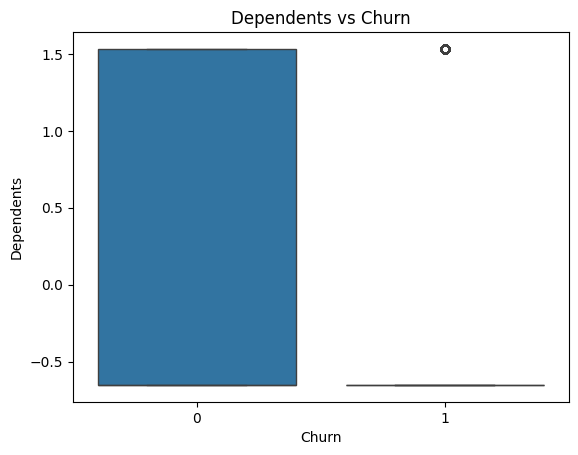

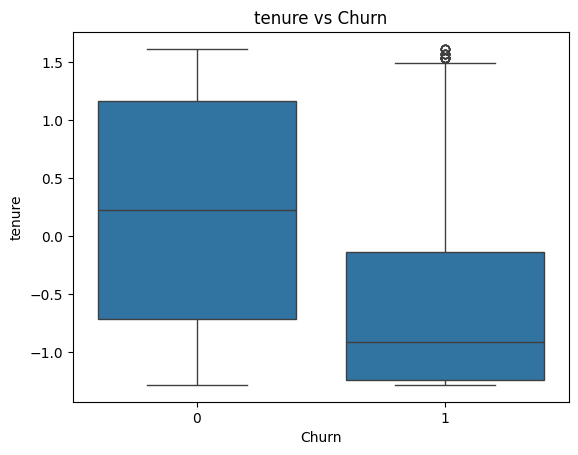

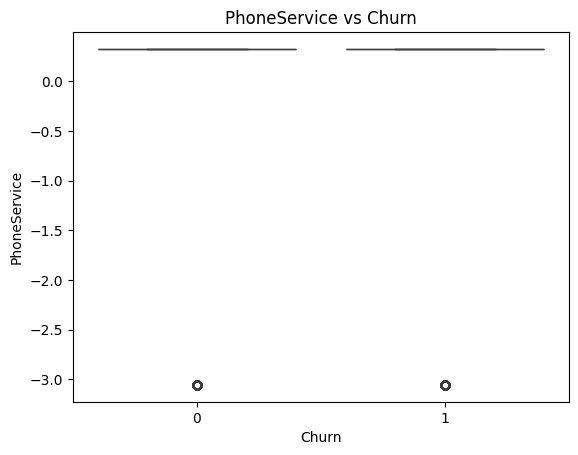

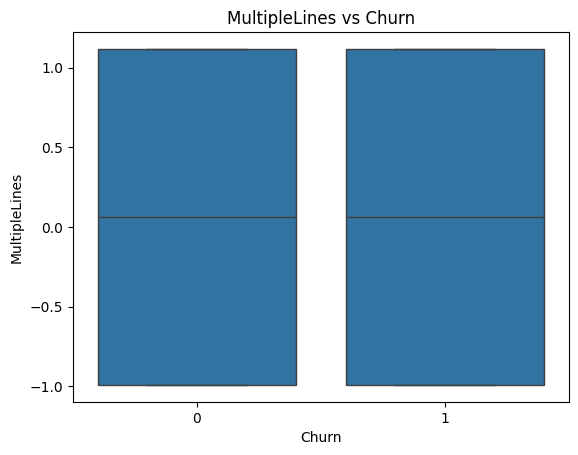

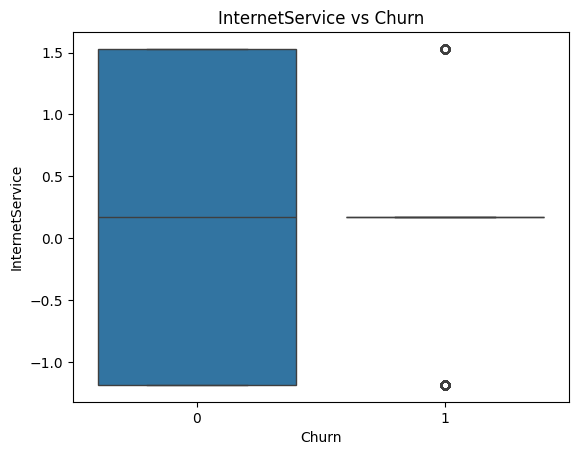

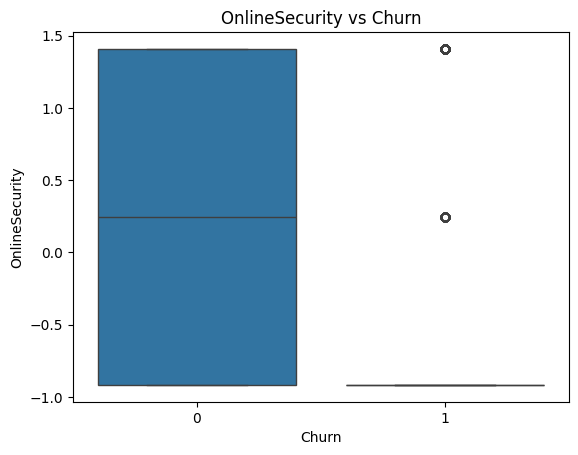

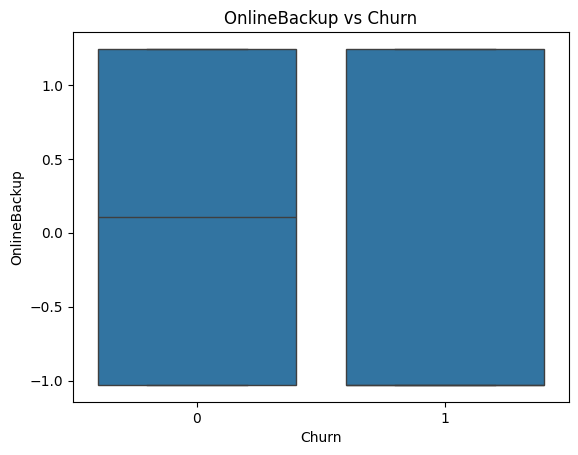

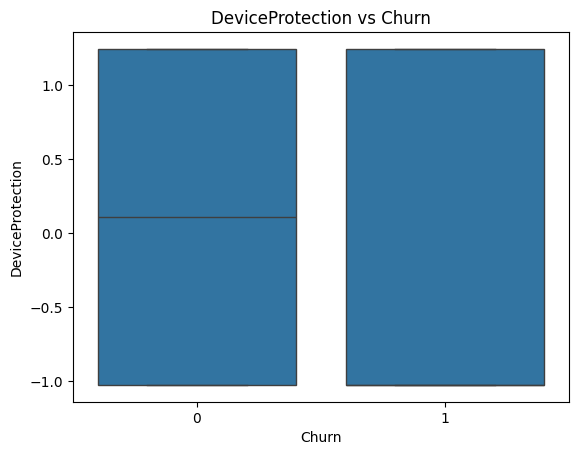

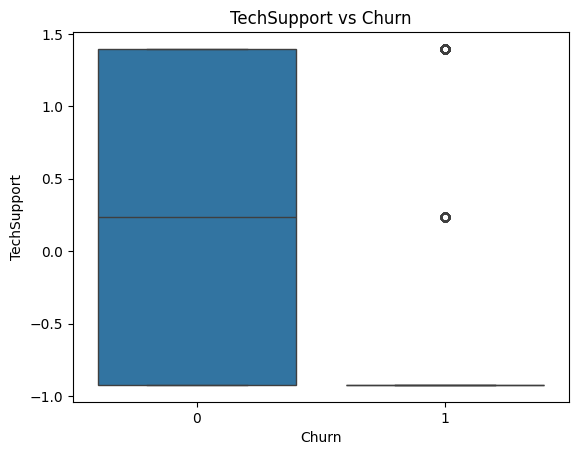

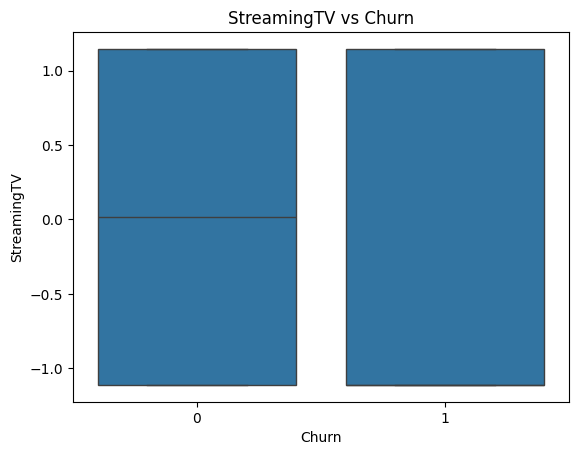

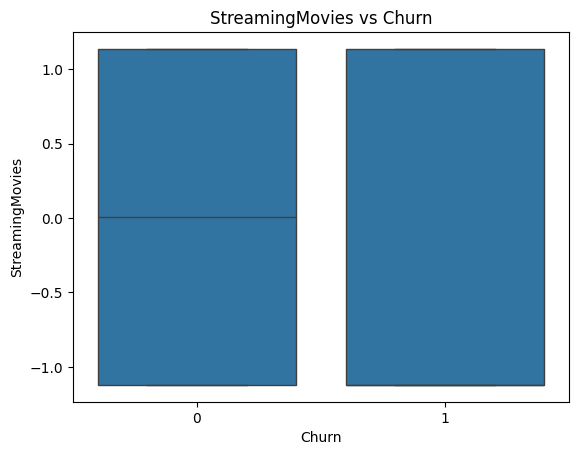

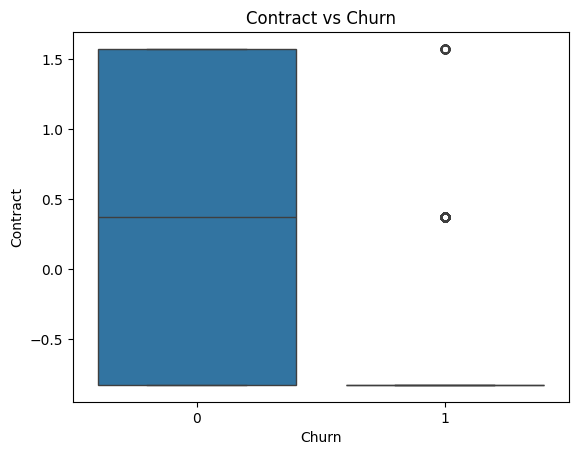

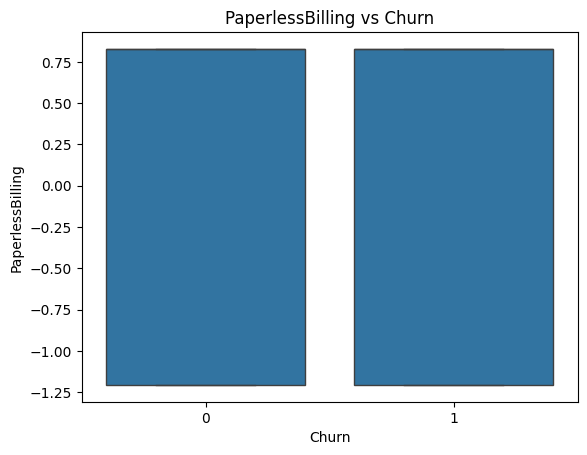

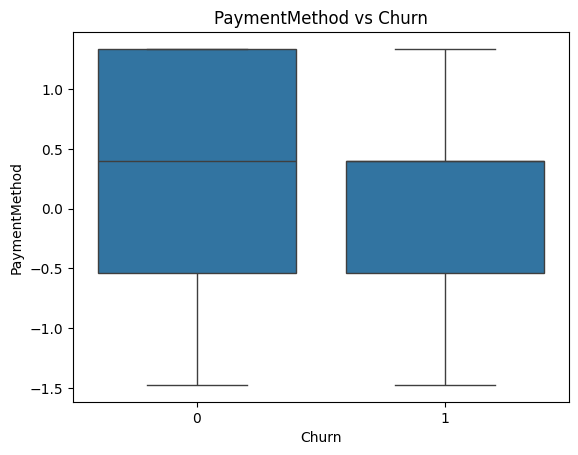

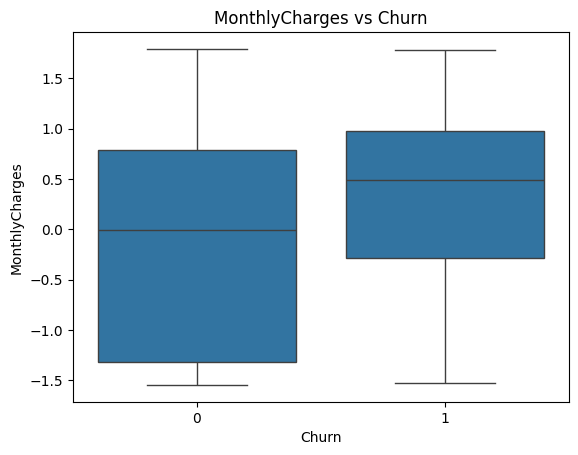

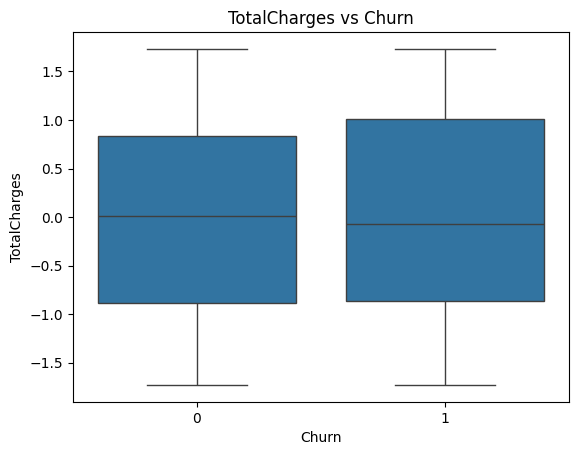

In [10]:
for col in num_cols:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()

## Key Insights

- The dataset had several missing values which were removed.
- Several features like contract type, internet service, and monthly charges show correlation with churn.
- Customers with month-to-month contracts and high monthly charges are more likely to churn.
- The dataset is slightly imbalanced with more non-churners.

These insights will guide our feature selection and modeling strategy.